##### 抓取影像的特定顏色
這篇教學會介紹使用 OpenCV 的 inrange() 方法，指定一個色彩範圍，抓取影像中符合色彩範圍內的顏色，透過這個方式，就可以篩選出影像中的特定顏色物件。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### inrange() 抓取特定範圍顏色 
使用 OpenCV 的 inrange() 方法，可以指定一個色彩的最低數值與最高數值 ( 使用 NumPy 陣列 )，抓取符合這個色彩範圍內的所有像素成為新影像\
( 範圍外的像素都會被過濾掉 )，使用方法如下：

In [ ]:
cv2.inRange(img, lowerb, upperb)
# img 來源影像
# 色彩範圍最低數值
# 色彩範圍最高數值

舉例來說，如果要擷取攝影機畫面中的紅色瓶蓋，可以先觀察並記錄瓶蓋的紅色區間 ( 透過其他繪圖軟體 )，區間約略在紅色 252 左右，綠色 70～80 之間，藍色 55～70 之間。

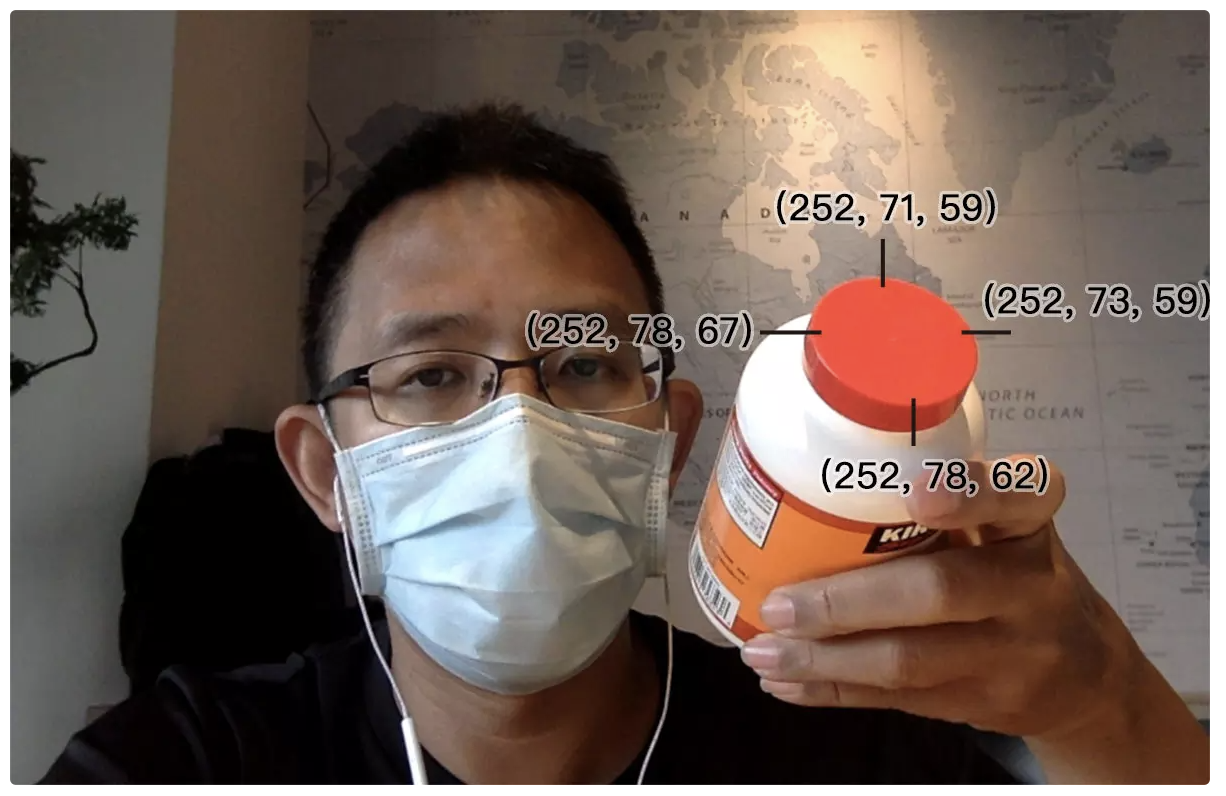

下方的例子，將色彩選取的範圍加大，搭配影像遮罩，就能將擷取出紅色的瓶蓋的部分。

* 參考：[影像遮罩](https://steam.oxxostudio.tw/category/python/ai/opencv-mask.html)

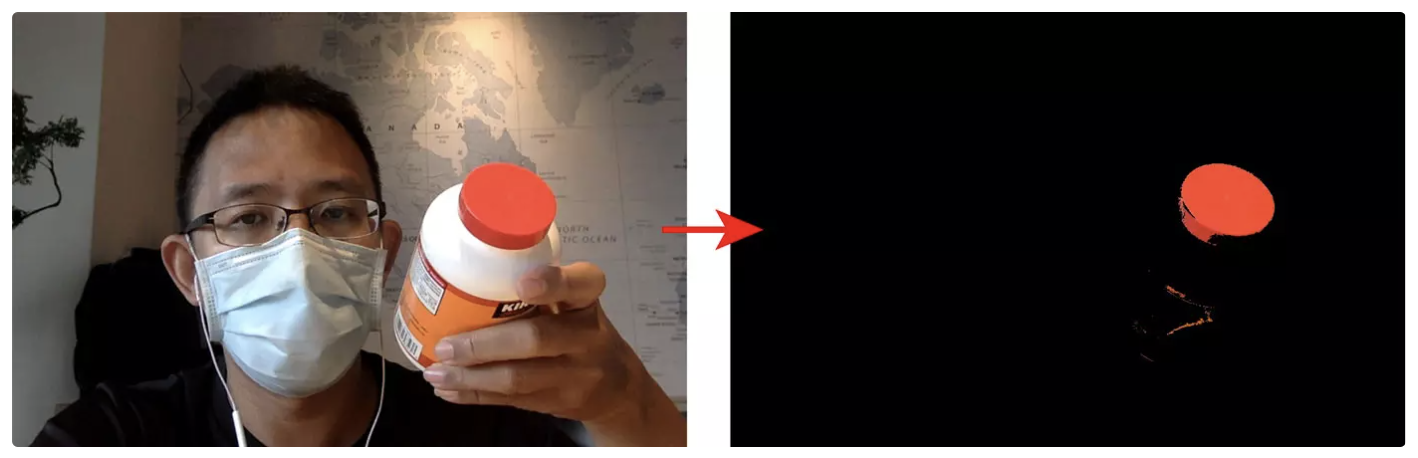

In [ ]:
import cv2
import numpy as np

# 設定白色的下限範圍 (稍微變小)
lower = np.array([0, 0, 200])  # 轉換成 NumPy 陣列，範圍設定為白色的下限
# 設定白色的上限範圍 (稍微加大)
upper = np.array([180, 55, 255]) # 轉換成 NumPy 陣列，範圍設定為白色的上限

# 讀取影像
img = cv2.imread('oxxo.jpg')

# 使用 inRange 函數來建立遮罩，範圍在 lower 和 upper 之間的像素會被保留
mask = cv2.inRange(img, lower, upper)

# 使用 bitwise_and 函數來套用影像遮罩，保留範圍內的像素
output = cv2.bitwise_and(img, img, mask=mask)

# 將結果影像寫入檔案
cv2.imwrite('output.jpg', output)

# 按下任意鍵停止
cv2.waitKey(0)
cv2.destroyAllWindows()

#####  即時抓取影片的特定顏色 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，就能即時獨立出攝影機影片中的瓶蓋。

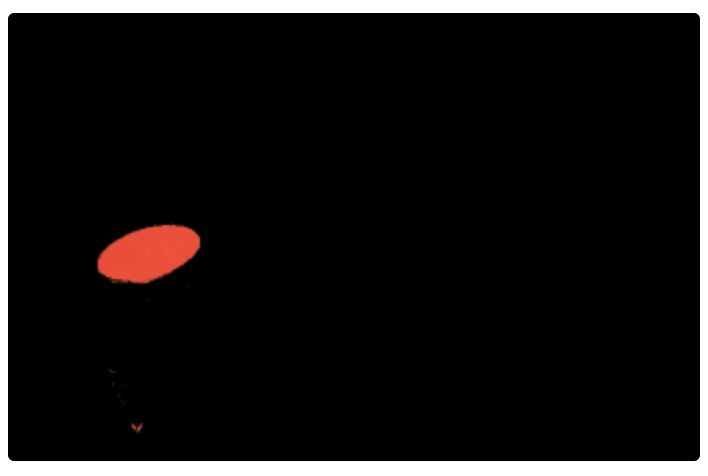

In [18]:
import cv2
import numpy as np

# 調整白色的下限範圍
lower = np.array([15, 15, 150])  # H: 0, S: 0, V: 180
# 調整白色的上限範圍
upper = np.array([120, 30, 255]) # H: 180, S: 50, V: 255

# 開啟攝影機
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取攝影機影像
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    
    # 將影像轉換為 HSV 色彩空間
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # 使用 inRange 函數來建立遮罩，範圍在 lower 和 upper 之間的像素會被保留
    mask = cv2.inRange(hsv, lower, upper)
    
    # 使用 bitwise_and 函數來套用影像遮罩，保留範圍內的像素
    output = cv2.bitwise_and(frame, frame, mask=mask)
    
    # 顯示結果影像
    cv2.imshow('oxxostudio', output)
    
    # 按下 q 鍵停止
    if cv2.waitKey(1) == ord('q'):
        break

# 釋放攝影機資源並關閉所有視窗
cap.release()
cv2.destroyAllWindows()